In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from collections import Counter

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import graphviz

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [55]:
data1 = pd.read_csv("../Dataset/afterPCA.csv",low_memory=False)
data = data1.drop(['Unnamed: 0'],axis=1)
data1.head()

,Unnamed: 0,a,b,c,d,e,f,g,h,i,...,ag,ah,ai,aj,ak,al,am,an,case_status,class_of_admission
0,0,1.718837,-1.564101,-0.624270,0.367709,0.787634,0.745779,-0.765707,-1.596453,-1.157607,...,-0.922478,0.366428,4.181433,0.626535,-2.943687,0.965737,0.967921,-0.684650,1,0
1,1,-3.220177,-2.130617,0.059023,1.123626,-1.581496,-0.053500,-0.764700,0.048586,0.543452,...,-0.082052,0.325926,0.313514,-0.302003,0.611517,-0.233497,-0.741353,0.197093,0,0
2,2,-0.683024,-2.358398,-0.380102,0.324592,1.533251,1.329765,-0.661416,0.501212,-0.193716,...,-0.344387,0.231931,-0.131912,0.825182,-0.686843,-0.775654,0.987073,0.298712,1,0
3,3,-0.892537,-1.527530,1.762655,-2.958144,2.314363,1.380884,0.675292,-1.719787,1.551155,...,-1.154058,-1.841991,0.730057,-2.563708,-0.313658,-0.725614,-3.706364,-0.036169,1,0
4,4,1.378325,0.700173,1.513348,0.407777,1.708383,0.722666,-1.202219,1.425830,-0.149194,...,0.225081,0.571899,-0.820183,0.676044,-0.288469,-0.799120,0.177217,0.058635,1,0


## Keep Track
Keeping track of the user's details to get his recommendations

In [135]:
data_before = pd.read_csv("../Dataset/dweepafinal.csv",low_memory=False)
data_before.drop(['Unnamed: 0'],axis=1,inplace = True)
data_before.head()

,agent_firm_name,case_status,class_of_admission,country_of_citizenship,employer_city,employer_decl_info_title,employer_name,employer_num_employees,employer_state,foreign_worker_info_education,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_state,pw_level_9089,pw_soc_title,wage_offer_from_9089
0,Reinhart Boerner Van Deuren s.c.,Certified,H-1B,INDIA,WAUKESHA,vp,GENERAC POWER SYSTEMS,1935.0,WISCONSIN,Bachelor's,UNIVERSITY OF KERALA,MECHANICAL ENGINEERING,WISCONSIN,4,Industrial Engineers,90000.0
1,Law Office of Jonathan Chin,Denied,H-1B,GERMANY,AURORA,chief,"AVIDITY, LLC",4.0,COLORADO,Doctorate,CHRISTIAN ALBRECHTS UNIVERSITY OF KIEL,MOLECULAR BIOLOGY,COLORADO,1,"Biological Scientists, All Other",65000.0
2,Cumming & Partners,Certified,H-1B,CANADA,NEW YORK,managing,TALBERT & TALBERT LLC,3.0,NEW YORK,Bachelor's,THE UNIVERSITY OF WESTERN ONTARIO,MEDIA STUDIES,NEW YORK,2,Public Relations Specialists,55700.0
3,"Law Offices of Kendra S. Elliott, Esq.",Certified,H-1B,BRAZIL,GALENA PARK,manager,"GREEN EARTH FUELS OF HOUSTON, LLC.",36.0,TEXAS,Bachelor's,CENTRO UNIVERSITARIO DE CIDADE - UNIVERCIDADE,MARKETING,TEXAS,2,Market Research Analysts and Marketing Special...,53560.0
4,"Law Office of Thomas V. Allen, PLLC",Certified,H-1B,INDIA,FEDERAL WAY,general,APPLEXUS TECHNOLOGIES LLC,36.0,WASHINGTON,Bachelor's,MOHAMED SATHAK ENGINEERING COLLEGE (ANNA UNIVE...,ENGINEERING,NEW JERSEY,3,"Software Developers, Applications",99424.0


## Setting up recommendation system based on Nearest Neighbours

In [4]:
y=data['case_status']
data1=data.drop(['case_status',],axis=1)
X=data1

In [5]:
nbrs = NearestNeighbors(n_neighbors=6).fit(X)
distances, indices = nbrs.kneighbors(X)

In [6]:
indices

array([[     0,    392,  15188,  20913,  44912,  45912],
       [     1,   7325,   9442,  20255,  20966,  21823],
       [     2,   4771,  14260,  18603,  23158,  29379],
       ...,
       [150770, 144326, 148185, 146306, 148593, 144216],
       [150771, 147672, 143365, 140792, 148191, 148738],
       [150772, 147359, 147735, 148545, 143403, 141026]])

In [7]:
d=dict()
for index, row in  X.iterrows():
    d[str(list(row))]=index

In [8]:
len(d)

150773

## Splitting into testing and training and Oversampling '0's

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2)

In [10]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_resampled).items()))

[(0, 116599), (1, 116599)]


In [11]:
X_train = X_resampled
y_train= y_resampled

In [12]:
print('Train samples count')
a = [i for i in y_train if i==0]
print('0',len(a))
print('1',len(y_train)-len(a))

print('\nTest samples count')
a = [i for i in y_test1 if i==0]
print('0',len(a))
print('1',len(y_train1)-len(a))

Train samples count
0 116599
1 116599

Test samples count
0 1002
1 119616


# Predicting using a model

In [136]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=X_train.shape[1], units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 30,verbose=1)

Epoch 1/30
233198/233198 [==============================] - 5s 20us/step - loss: 0.6932 - acc: 0.4999
Epoch 2/30
233198/233198 [==============================] - 4s 19us/step - loss: 0.6932 - acc: 0.4993
Epoch 3/30
233198/233198 [==============================] - 4s 19us/step - loss: 0.6932 - acc: 0.4979
Epoch 4/30
233198/233198 [==============================] - 4s 19us/step - loss: 0.6932 - acc: 0.4993
Epoch 5/30
233198/233198 [==============================] - 5s 20us/step - loss: 0.6932 - acc: 0.4999
Epoch 6/30
233198/233198 [==============================] - 5s 20us/step - loss: 0.6932 - acc: 0.5000
Epoch 7/30
233198/233198 [==============================] - 5s 21us/step - loss: 0.6932 - acc: 0.4990
Epoch 8/30
233198/233198 [==============================] - 5s 20us/step - loss: 0.6932 - acc: 0.5007
Epoch 9/30
233198/233198 [==============================] - 5s 21us/step - loss: 0.6932 - acc: 0.5001
Epoch 10/30
233198/233198 [==============================] - 5s 20us/step - loss: 

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round(),labels=[1,0]).ravel()
print(tn, fp, fn, tp)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
fmeasure = round(2*((precision*recall)/(precision+recall)),2)
precision, recall, fmeasure

28340 813 780 222


(0.21, 0.22, 0.21)

## Finding the nearest certified neighbours

In [41]:
y_true = np.asarray(y_test1)

In [42]:
y_predict = pd.DataFrame(y_true)
y_denied = y_predict[y_predict[0]==0]
y_denied.head()

,0
31,0
39,0
172,0
186,0
187,0
188,0
308,0
344,0
348,0
403,0


In [43]:
denied_applicants = list()
for index,row in y_denied.iterrows():
    info = X_test1.iloc[index,:]
    info = str(list(info))
    denied_applicants.append(d[info])

In [51]:
neigh = indices[list(indices[:,0]).index(denied_applicants[0])]

for i in neigh:
        print(data_before.iloc[i,:])

agent_firm_name                  THE KHOSLA IMMIGRATION LAW GROUP, P.C.
case_status                                                      Denied
class_of_admission                                                 H-1B
country_of_citizenship                                            INDIA
employer_city                                                  STERLING
employer_decl_info_title                                        manager
employer_name                                     UNIFIED SYSTEMS, INC.
employer_num_employees                                               22
employer_state                                                       VA
foreign_worker_info_education                                  Master's
foreign_worker_info_inst              NATIONAL UNIVERSITY OF TECHNOLOGY
foreign_worker_info_major                  COMPUTER INFORMATION SYSTEMS
foreign_worker_info_state                                            VA
pw_level_9089                                                   

In [102]:
def compare(i,indices,denied_applicants,data_before):
    neigh = indices[list(indices[:,0]).index(denied_applicants[i])]
    collection = []
    for i in range(len(neigh)):
        if(i==0):
            collection.append(data_before.iloc[neigh[i],:])
        else:
            if(data_before.iloc[neigh[i],1]=='Certified'):
                collection.append(data_before.iloc[neigh[i],:])
    x = collection[0]
    diff=[]
    for i in range(1,len(collection)):
        for j in range(len(data_before.columns)):
            if(x[j] == collection[i][j]):
                continue
            else:
                diff.append(data_before.columns[j])
    return Counter(diff)

In [103]:
diff=Counter()
for i in range(len(denied_applicants)):
    diff +=compare(i,indices,denied_applicants,data_before)

In [104]:
diff

Counter({'agent_firm_name': 3382,
         'case_status': 4087,
         'class_of_admission': 67,
         'country_of_citizenship': 1376,
         'employer_city': 3149,
         'employer_decl_info_title': 2726,
         'employer_name': 3363,
         'employer_num_employees': 3594,
         'employer_state': 1524,
         'foreign_worker_info_education': 510,
         'foreign_worker_info_inst': 4019,
         'foreign_worker_info_major': 3774,
         'foreign_worker_info_state': 2729,
         'pw_level_9089': 659,
         'pw_soc_title': 3149,
         'wage_offer_from_9089': 3816})

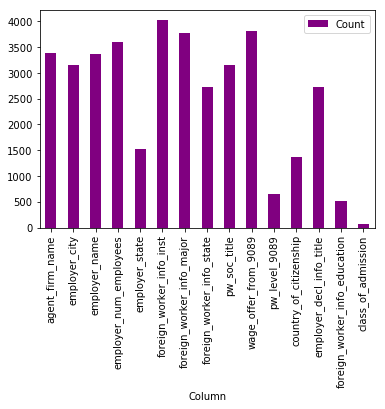

In [133]:
difference = pd.DataFrame()
difference['Column'] = (diff.keys())
difference['Count'] = (diff.values())
difference=difference[difference['Column'] != 'case_status']
difference.index = difference['Column']
difference.drop(['Column'], inplace = True, axis = 1)
difference.plot.bar(color = ['purple'])
plt.show()

In [134]:
#stay in school dont do drugs